In [8]:
# required imports 
from engens.core.EnGens import *
import engens.core.FeatureSelector as fs
import pickle
import mdshare
import mdtraj
import numpy as np
import nglview
from IPython.display import Javascript, display
import json
from engens.core.ClustEn import *
from engens.core.DimReduction import *
from engens.core.PlotUtils import *

# TICA - kmeans - single representative - center of the cluster

In [237]:

#~~~~~~~~~~LOAD~~~~~~~~~~~~#
top_loc = 'adora2a.pdb'
traj_loc = 'adora2a.xtc'

binding_site_selstr = "residue==7 or residue==61 or residue==64 or residue==65 \
or residue==79 or residue==82 or residue==83 or residue==86 or residue==87 or \
residue==165 or residue==166 or residue==167 or residue==175 or residue==179 \
or residue==244 or residue==247 or residue==248 or residue==250 or residue==251 \
or residue==263 or residue==268 or residue==271 or residue==272 or residue==275 or residue==276"

engen = EnGen(traj_loc, top_loc, binding_site_selstr, align=True)

#~~~~~~~~~~FEATURIZE~~~~~~~~~~~~#

#center of mass and torsion angles
feat3 = {
            "add_backbone_torsions": {"cossin":True, "periodic":False},
            "add_residue_mindist": {"scheme":'closest-heavy'}
}
#add the respective features to the engen structure
engen.add_featurizer(feat3)

#apply features
engen.apply_featurizations()
#print possible features
print(engen.describe_featurizers())
#select the number of the desired feature
feat_num = 0
# initialize selector
featsel = fs.UserFeatureSelection(feat_num, engen)
#select the feature
featsel.select_feature()


Cleaning files...: 100%|██████████| 3/3 [00:00<00:00, 267.15it/s]
Making the selection... : 30it [00:02, 13.69it/s]
Cleaning files...: 100%|██████████| 30/30 [00:00<00:00, 792.83it/s]

02-04-22 23:33:42 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[226] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


Featurizer no. 0:
 backbone_torsions&residue_mindist
['COS(PHI 0 ALA 61)', 'SIN(PHI 0 ALA 61)', 'COS(PSI 0 TYR 7)', 'SIN(PSI 0 TYR 7)', 'COS(PHI 0 ILE 64)', 'SIN(PHI 0 ILE 64)', 'COS(PSI 0 ALA 61)', 'SIN(PSI 0 ALA 61)', 'COS(PHI 0 SER 65)', 'SIN(PHI 0 SER 65)']...['RES_DIST (closest-heavy) ASN251 - ALA271', 'RES_DIST (closest-heavy) ASN251 - ILE272', 'RES_DIST (closest-heavy) ASN251 - SER275', 'RES_DIST (closest-heavy) ASN251 - HIS276', 'RES_DIST (closest-heavy) ALA263 - ILE272', 'RES_DIST (closest-heavy) ALA263 - SER275', 'RES_DIST (closest-heavy) ALA263 - HIS276', 'RES_DIST (closest-heavy) MET268 - SER275', 'RES_DIST (closest-heavy) MET268 - HIS276', 'RES_DIST (closest-heavy) ALA271 - HIS276']
 
Picked featurized no. 0: backbone_torsions&residue_mindist
['COS(PHI 0 ALA 61)', 'SIN(PHI 0 ALA 61)', 'COS(PSI 0 TYR 7)', 'SIN(PSI 0 TYR 7)', 'COS(PHI 0 ILE 64)', 'SIN(PHI 0 ILE 64)', 'COS(PSI 0 ALA 61)', 'SIN(PSI 0 ALA 61)', 'COS(PHI 0 SER 65)', 'SIN(PHI 0 SER 65)', 'COS(PSI 0 ILE 64)', 'SIN

Transforming with TICA - might take some time!
lag: 1
lag: 5
lag: 9
lag: 13
lag: 17
lag: 22
lag: 26
lag: 30
lag: 34
lag: 38
lag: 43
lag: 47
lag: 51
lag: 55
lag: 60
Chosen lag time: 13
Number of processes above lag time: 14
Number of clearly resolved processes with TICA: 1
Processes (index, timescale): 
[(0, 659.6316561838645)]
5


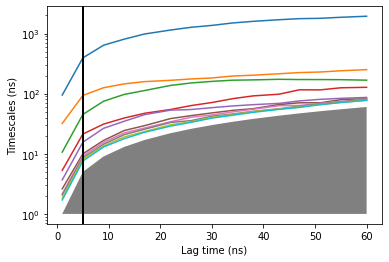

TICA explained variance (with thr = 85) by first 146 components
Total of 85.14930140633588% of variance explaned by first 146 ICs.


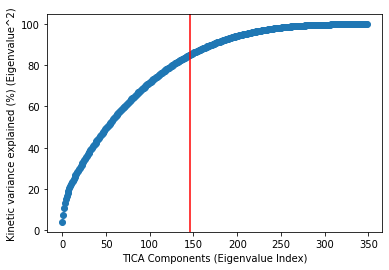

In [238]:

#~~~~~~~~~~DIMRED~~~~~~~~~~~~#

#chose TICA 
reduction_type = "TICA" 
#to make an informed decision on lag time range see the timescale of your simulation
traj_times = mdtraj.load(engen.traj, top=engen.ref).time
traj_nframes = len(traj_times)
lags = [int(np.log(i)) for i in np.logspace(1,  int(traj_nframes/50), num=15, base=np.e)]
#initialize TICA reducer
reducer = dimreds[reduction_type](engen, lags)
#estimate number of resolved processes and choose the lag time automatically
lag = reducer.choose_lag_auto()
if lag is None:
    reducer.plot_lag_analysis(chosen_lag=0)
    plt.show()
    lag = int(input("Please enter custom lag or run the cell again with different lags"))
lag = 5
print(lag)
reducer.choose_lag(lag)
#visualize TICA resolved process scales with different lags
reducer.plot_lag_analysis(chosen_lag=lag)
plt.show()
#choose variance threshold and number of components
var_thr = 85
n_components = reducer.get_variance(var_thr=var_thr)
reducer.plot_variance(var_thr=var_thr)
plt.show()
#select the corresponding number of components
reducer.choose_n(n_components)
reducer.apply()


Clustering with params={'n_clusters': 2}
Clustering with params={'n_clusters': 3}
Clustering with params={'n_clusters': 4}
Clustering with params={'n_clusters': 5}
Clustering with params={'n_clusters': 6}
Clustering with params={'n_clusters': 7}
Clustering with params={'n_clusters': 8}
Clustering with params={'n_clusters': 9}
Clustering with params={'n_clusters': 10}
Clustering with params={'n_clusters': 11}
Clustering with params={'n_clusters': 12}
Clustering with params={'n_clusters': 13}
Clustering with params={'n_clusters': 14}
Clustering with params={'n_clusters': 15}
Clustering with params={'n_clusters': 16}
Clustering with params={'n_clusters': 17}
Clustering with params={'n_clusters': 18}
Clustering with params={'n_clusters': 19}
Clustering with params={'n_clusters': 20}
Clustering with params={'n_clusters': 21}
Clustering with params={'n_clusters': 22}
Clustering with params={'n_clusters': 23}
Clustering with params={'n_clusters': 24}
Clustering with params={'n_clusters': 25}


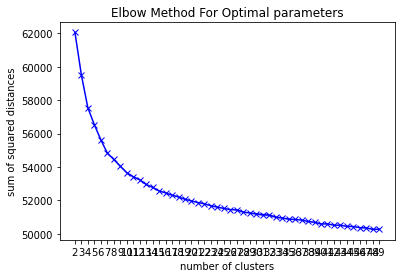

Optimal params={'n_clusters': 10}


{'n_clusters': 10}

In [239]:

#~~~~~~~~~~~CLUST~~~~~~~~~~~~#

clustering = "KM"
cluster_method = clusterings[clustering](engen, n_rep=2)

params = [{"n_clusters":i} for i in range(2, 50)]
cluster_method.cluster_multiple_params(params)

# analyze these parameters with the elbow method
cluster_method.analyze_elbow_method()

In [240]:
# pick the number of clusters
n = 10
cluster_method.choose_n(n)

Chosen cluster ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


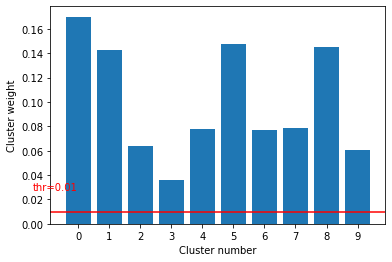

In [241]:
cluster_method.choose_clusters(thr=0.01)

0
1
2
3
4
5
6
7
8
9


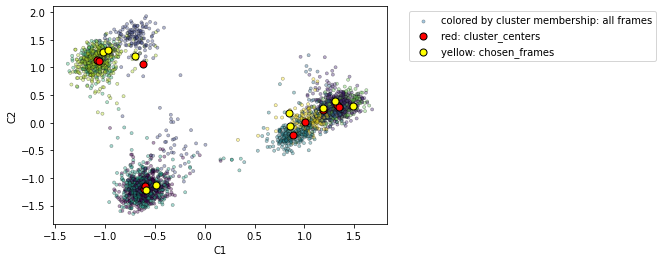

In [242]:

cluster_method.choose_conformations()

In [243]:
result_ensembles = {}

In [244]:
result_ensembles["tica-kmeans-centers"] = cluster_method.chosen_frames

In [245]:
list(cluster_method.chosen_frames)

[1459, 373, 2974, 677, 1095, 2167, 1666, 73, 1493, 848]

## Super-cluster within the cluster - metric tica

In [246]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import ward, fcluster, leaders
from scipy.spatial.distance import pdist

In [247]:
## assign proportionally the number of representatives accoarding to the number of elements in the cluster

number_of_seats = 34 
number_of_clusters = 10
seats_left = number_of_seats
seats = np.zeros(number_of_clusters)
votes = np.histogram(cluster_method.labels[cluster_method.chosen_index], bins=np.arange(0, number_of_clusters+1))[0]
vote_list = np.histogram(cluster_method.labels[cluster_method.chosen_index], bins=np.arange(0, number_of_clusters+1))[0]
while seats_left > 0:
    max_prop = np.argmax(vote_list)
    seats[max_prop] += 1 
    vote_list[max_prop] = float(votes[max_prop])/(seats[max_prop]+1)
    seats_left -= 1

In [248]:
seats

array([6., 5., 2., 1., 3., 5., 2., 3., 5., 2.])

In [249]:
## do hierarchical clustering within each cluster
hub_frames = []
labels = cluster_method.labels[cluster_method.chosen_index]
for cluster_id in set(labels):
    print(cluster_id)
    clust_indexes = np.argwhere(labels == cluster_id).flatten()
    cluster_data = engen.dimred_data[clust_indexes]
    dist_mat = pdist(cluster_data)
    Z = ward(dist_mat)
    T = cut_tree(Z, seats[cluster_id]).flatten()
    #tmp_hubs = []
    for subclust_id in range(int(seats[cluster_id])):
        elems = np.argwhere(T==subclust_id)
        elems_dist = dist_mat[elems]
        elems_dist_sum = np.apply_over_axes(np.sum, elems_dist, (1)).flatten()
        hub_subclust = np.argmin(elems_dist_sum)
        hub_cluster_ind = elems[hub_subclust]
        hub_frame_ind = clust_indexes[hub_cluster_ind]
        hub_frames.append(hub_frame_ind[0])
    #hub_frames.append(tmp_hubs)

0
1
2
3
4
5
6
7
8
9


In [250]:
hub_frames

[2764,
 2601,
 1379,
 1435,
 1432,
 2674,
 258,
 5,
 636,
 761,
 640,
 2792,
 2999,
 674,
 924,
 1090,
 915,
 1193,
 1196,
 2077,
 2571,
 2102,
 1797,
 1650,
 171,
 269,
 103,
 2969,
 1581,
 1485,
 1523,
 2356,
 853,
 891]

## Sub-cluster within the cluster - metric RMSD

In [ ]:
traj = mdtraj.load("adora2a-aligned.xtc", top = "adora2a.pdb")
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = mdtraj.rmsd(traj, traj, i)

In [270]:
## do hierarchical clustering within each cluster
import scipy

    
hub_frames = []
labels = cluster_method.labels[cluster_method.chosen_index]
for cluster_id in set(labels):
    print(cluster_id)
    clust_indexes = np.argwhere(labels == cluster_id).flatten()
    trajs = []
    dist_mat = distances[clust_indexes, :][:, clust_indexes]
    
    #linkage = scipy.cluster.hierarchy.linkage(dist_mat, method='average')
    #subclusters = scipy.cluster.hierarchy.fcluster(linkage, t=0.2, criterion="distance")
    Z = ward(dist_mat)
    T = cut_tree(Z, seats[cluster_id]).flatten()

    tmp_hubs = []
#    for subclust_id in set(subclusters):
#        elems = np.argwhere(subclusters==subclust_id)
    for subclust_id in range(int(seats[cluster_id])):
        elems = np.argwhere(T==subclust_id)
        elems_dist = dist_mat[elems.flatten(), :][:, elems.flatten()]
        elems_dist_sum = np.apply_over_axes(np.sum, elems_dist<0.2, (1)).flatten()
        hub_subclust = np.argmax(elems_dist_sum)
        hub_cluster_ind = elems[hub_subclust]
        hub_frame_ind = clust_indexes[hub_cluster_ind]
        tmp_hubs.append(hub_frame_ind[0])
    print(len(tmp_hubs))
    hub_frames.extend(tmp_hubs)

0
6
1
5
2
2
3
1
4
3
5
5
6
2
7
3
8
5
9
2


In [271]:
hub_frames

[2645,
 2601,
 1276,
 1357,
 2678,
 2028,
 12,
 225,
 292,
 389,
 617,
 2970,
 2860,
 741,
 1079,
 908,
 1156,
 2542,
 2101,
 2518,
 1246,
 2528,
 1740,
 1621,
 168,
 104,
 481,
 1554,
 1465,
 1823,
 2345,
 2929,
 1006,
 824]

In [269]:
dist_mat.shape

(510, 510)

In [225]:
distances[clust_indexes, :][:, clust_indexes].shape

(261, 261)

In [220]:
distances.shape

(3000, 3000)

In [201]:
mdtraj.join([mdtraj.load_frame(engen.traj, 1, top = engen.ref), mdtraj.load_frame(engen.traj, 1, top = engen.ref)])

<mdtraj.Trajectory with 2 frames, 201 atoms, 25 residues, without unitcells at 0x7fb0b6953748>

In [190]:
np.argwhere(Z[:-1, 1]==316)

array([], shape=(0, 1), dtype=int64)

In [163]:
Z[154, :]

array([305.        , 313.        ,   4.78302521,  38.        ])

In [165]:
Z[159, :]

array([319.        , 320.        ,   7.36982255, 124.        ])

In [156]:
Z

array([[ 67.        ,  95.        ,   1.83763685,   2.        ],
       [ 71.        ,  74.        ,   1.87009161,   2.        ],
       [  9.        , 104.        ,   1.87906144,   2.        ],
       ...,
       [317.        , 318.        ,   6.08443409,  89.        ],
       [319.        , 320.        ,   7.36982255, 124.        ],
       [316.        , 321.        ,   7.95289664, 162.        ]])

In [164]:
321-162

159

In [135]:
T.shape

(324,)

In [146]:
T.astype("i") 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [127]:
T.dtype=int

In [110]:
from  scipy.cluster.hierarchy import cut_tree

In [139]:
cut_tree(Z, 2).flatten().shape

(162,)

In [128]:
T

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
cluster_method.labels[cluster_method.chosen_index]

array([5, 5, 2, ..., 6, 6, 6], dtype=int32)

In [47]:
hub_frames = []
labels = cluster_method.labels[cluster_method.chosen_index]

for cluster_id in set(labels):
    print(cluster_id)
    clust_indexes = np.argwhere(labels == cluster_id).flatten()
    print(clust_indexes)
    cluster_data = engen.dimred_data[clust_indexes]
    dist_mat = distance_matrix(cluster_data, cluster_data)
    dist_mat_sum = np.apply_over_axes(np.sum, dist_mat<2, (1)).flatten()
    print(dist_mat_sum)
    hub_index = np.argmin(dist_mat_sum)
    print(hub_index)
    hub_frame_index = clust_indexes[hub_index]
    hub_frames.append(hub_frame_index)
    print("~~~~~~~~~~~~~~")

0
[ 628  812  897 ... 1182 1184 1185]
[1 1 1 ... 1 1 1]
0
~~~~~~~~~~~~~~
1
[1190 1191 1193 ... 2813 2913 2944]
[1 1 1 ... 6 1 2]
0
~~~~~~~~~~~~~~
2
[   2   24   27 ... 1107 1111 1114]
[1 3 1 ... 2 1 1]
0
~~~~~~~~~~~~~~
3
[1189 1192 1194 ... 2740 2764 2979]
[ 1  1  1 ...  5 13  8]
0
~~~~~~~~~~~~~~
4
[  21  638  639 ... 1122 1165 1186]
[1 1 1 ... 1 1 1]
0
~~~~~~~~~~~~~~
5
[  0   1   3 ... 881 884 968]
[1 1 1 ... 1 1 1]
0
~~~~~~~~~~~~~~
6
[1187 1188 1199 ... 2997 2998 2999]
[1 1 3 ... 1 1 9]
0
~~~~~~~~~~~~~~
7
[1183 1246 1472 ... 2617 2788 2882]
[ 1 13  1 ...  1  1  1]
0
~~~~~~~~~~~~~~
8
[1200 1209 1215 ... 2966 2967 2974]
[ 1  5  1 ...  1  1 12]
0
~~~~~~~~~~~~~~
9
[  23   84   91 ...  780  807 1023]
[1 1 1 ... 1 1 1]
0
~~~~~~~~~~~~~~
10
[  6   7   8 ... 627 753 754]
[1 1 1 ... 1 1 1]
0
~~~~~~~~~~~~~~


In [51]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
np.argwhere(cluster_method.labels[cluster_method.chosen_index] == 2).flatten()

array([   2,   24,   27, ..., 1107, 1111, 1114])

In [35]:
tmp = engen.dimred_data[np.argwhere(cluster_method.labels[cluster_method.chosen_index] == 2).flatten()]

In [42]:
np.argmin(np.apply_over_axes(np.sum, distance_matrix(tmp, tmp), (1)).flatten())

134